# Part 1: Simulating the robot

In [1]:
import numpy as np
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
from scipy.stats import norm
import seaborn as sns
import pandas as pd

def func(U,x):
    #-2x+2U
    val = -(2*x) + 2*U
    return val
def simulation(x,t,h):
    save = 0
    U_save = []
    t_save = []
    x_save = []
    x_exact_save = []

    U_array = []
    t_array = []
    x_array = []
    x_exact_array = []
    while(t <= 15):
        if(t <= 5):
            U = 2
        elif(t < 5 or t <= 10):
            U = 1
        elif(t < 10 or t <=15):
            U = 3
        #print("U value:", x)
        U_array.append(U)
        k = h * func(U,x)
        x = x + k
        t = t + h
        #value under graph
        x_exact = U - math.exp(-2*t)
        t_array.append(t)
        x_array.append(x)
        x_exact_array.append(x_exact)
        save+=1
        #save every 10th integral if h<=0.01
        if(save%10 == 0):
            U_save.append(U)
            t_save.append(t)
            x_save.append(x)
            x_exact_save.append(x_exact)
            #print("save1: ",save)
        #print("Where it is: ",x,"Exact pos= ",x_exact,"Time: ",t)
    return U_save,t_save,x_save,x_exact_save,U_array,t_array,x_array,x_exact_array 

The following step sizes were provided to measure against: 0.75, .5, 0.25, 0.01, 0.001


## Step size 0.001

In [2]:
U_save1 = []
t_save1 = []
x_save1 = []
x_exact_save1 = []


##saves every time
U_array1 = []
t_array1 = []
x_array1 = []
x_exact_array1 = []

#step size 
U_save1,t_save1,x_save1,x_exact_save1,U_array1,t_array1,x_array1,x_exact_array1=simulation(0,0,0.001)

#0.35 for bell curve

## Step size 0.01

In [3]:
U_save2 = []
t_save2 = []
x_save2 = []
x_exact_save2 = []


##saves every time
U_array2 = []
t_array2 = []
x_array2 = []
x_exact_array2 = []

#step size 
U_save2,t_save2,x_save2,x_exact_save2,U_array2,t_array2,x_array2,x_exact_array2=simulation(0,0,0.01)

#0.35 for bell curve

## Step size 0.25

In [4]:
U_save3 = []
t_save3 = []
x_save3 = []
x_exact_save3 = []


##saves every time
U_array3 = []
t_array3 = []
x_array3 = []
x_exact_array3 = []

#step size 
U_save3,t_save3,x_save3,x_exact_save3,U_array3,t_array3,x_array3,x_exact_array3=simulation(0,0,0.25)

## Step size 0.5

In [5]:
U_save4 = []
t_save4 = []
x_save4 = []
x_exact_save4 = []


##saves every time
U_array4 = []
t_array4 = []
x_array4 = []
x_exact_array4 = []

#step size 
U_save4,t_save4,x_save4,x_exact_save4,U_array4,t_array4,x_array4,x_exact_array4=simulation(0,0,0.5)

## Step size 0.75

In [6]:
U_save5 = []
t_save5 = []
x_save5 = []
x_exact_save5 = []


##saves every time
U_array5 = []
t_array5 = []
x_array5 = []
x_exact_array5 = []

#step size 
U_save5,t_save5,x_save5,x_exact_save5,U_array5,t_array5,x_array5,x_exact_array5=simulation(0,0,0.75)

## Saving values into a dataframe and plotting it 

In [7]:
data1 = {'X':x_array1,'T':t_array1}
df1 = pd.DataFrame(data1)
data2 = {'X':x_array2,'T':t_array2}
df2= pd.DataFrame(data2)
data3 = {'X':x_array3,'T':t_array3}
df3= pd.DataFrame(data3)
data4= {'X':x_array4,'T':t_array4}
df4= pd.DataFrame(data4)
data5= {'X':x_array5,'T':t_array5}
df5= pd.DataFrame(data5)

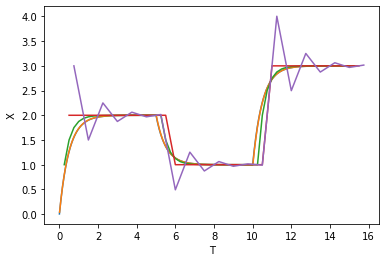

In [8]:
plt3 = sns.lineplot(x="T", y="X", data=df1) #blue
plt4 = sns.lineplot(x="T", y="X", data=df2) #Orange
plt5 = sns.lineplot(x="T", y="X", data=df3) #Green
plt6 = sns.lineplot(x="T", y="X", data=df4) #Red
plt7 = sns.lineplot(x="T", y="X", data=df5) #Purple

## Error evaluation against step size

# Part 2: Random Noise using Box Muller Method

## Initialise/Compute standard deviation and mean

In [9]:
import statistics as stat
std_dev1 = stat.stdev(x_array1)
_mean1 = stat.mean(x_array1)

std_dev = 0.0431
_mean = 0.5
print("deviation: ",std_dev,"mean: ",_mean,"DEVIATION: ",std_dev1,"MEAN: ",_mean1)

deviation:  0.0431 mean:  0.5 DEVIATION:  0.7789244866974134 MEAN:  1.900142980914039


## compute box muller algorithm

In [10]:
def box_muller(array,standard_deviation,mean):
    random_vls = []
    i = 0
    it = 0
    while i < len(array):
        if(it == 0):
            z1 =  rand.uniform(0,2*np.pi)
            b  =  standard_deviation*np.sqrt(-2*math.log(rand.uniform(0,1)))
            z2 =  b*(math.sin(z1))+mean
            z3 =  b*(math.cos(z1))+mean
            noise = array[i] + z2
            random_vls.append(noise)
            it = 1
            i = i + 1
        else:
            it = 0
            noise = array[i] + z3
            random_vls.append(noise)
            i= i + 1
    return random_vls

In [11]:
random_vals = []
random_vals = box_muller(x_save2,std_dev,_mean)

## Noise plot

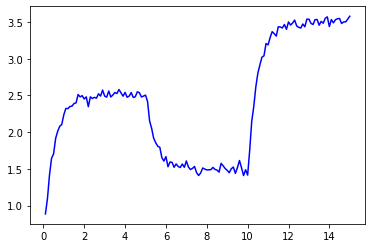

In [12]:
y = random_vals
x = t_save2
plt.plot(x,y,"b") #actual
plt.show()

## Proof that numbers generated fall within a gaussian distribution

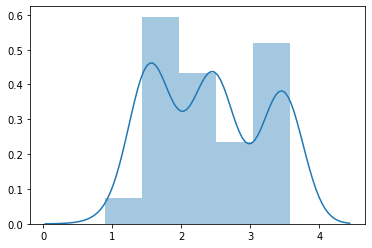

In [13]:
sns.distplot(random_vals)

# Part 3: Adding an intelligent agent to track the noise

In [14]:
##--------------------------------SINGLE PERCEPTRON-----------------------------------------------##
def sigmoid_activation(val):
  sigmoid = 1/1+np.exp(-val)
  return sigmoid

def predict_step(noise1,weights1):
    net_sum1 = 0
    net_sum1 = weights1[0]
    net_sum1+=weights1[1]*noise1
    #print("netsum:  ",net_sum1)
    return 1.0 if net_sum1 >= 1 else 0.0

def predict(noise2,weights2):
    net_sum = 0
    net_sum = weights2[0]
    net_sum += weights2[1]*noise2
    activation2 = sigmoid_activation(net_sum)
    return activation2, net_sum

def train_weights(array, lr, loops):
    weights3 = [-0.10,rand.uniform(0,1)]
    for loop in range(loops):
        net_array = []
        error_array = []
        sum_error = 0.0
        for a in array:
            prediction, netwrk_sum = predict(a,weights3)
            Target = a
            delta = Target - prediction
            error = delta
            error_array.append(error)
            net_array.append(prediction)
            weights3_change_bias= -lr*Target*error
            weights3[0] = weights3[0] + weights3_change_bias
            weights3_change= -lr*Target*error
            weights3[1] = weights3[1] + weights3_change
            sum_error += error**2
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (loop, lr, error))
    return net_array,error_array

def train_weights_step(array, lr, loops):
    weights3 = [-0.10,rand.uniform(0,1)]
    for loop in range(loops):
        net_array = []
        sum_error = 0.0
        for a in array:
            prediction = predict_step(a,weights3)
            Target = a
            delta = Target - prediction
            error = delta
            net_array.append(prediction)
            weights3_change_bias= -lr*Target*error
            weights3[0] = weights3[0] + weights3_change_bias
            weights3_change= -lr*Target*error
            weights3[1] = weights3[1] + weights3_change
            #print("weight",weights3[1])
            sum_error += error**2
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (loop, lr, error))
    return net_array
####---------------------------------------MULTI PERCEPTRON---------------------------------------------####
def train_weights3(array, lr, loops):
    weights3 = [-0.10,rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1)]
    for loop in range(loops):
        net_array = []
        error_array = []
        sum_error = 0.0
        c = 0
        c2 = 0
        for a in array:
            prediction, netwrk_sum = predict3(a,weights3)
            if c == 0:
                Target = a[2]
                #print(1)
            elif c==1:
                Target = a[1]
            else:
                Target = a[0]
            delta = Target - prediction
            error = delta
            error_array.append(error)
            net_array.append(prediction)
            weights3_change_bias= -lr*Target*error
            weights3[0] = weights3[0] + weights3_change_bias
            weights3_change= -lr*Target*error
            for i in range(len(a)-1):
                weights3[i + 1] = weights3[i +1] + weights3_change
            sum_error += error**2
            c = c + 1
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (loop, lr, error))
    return net_array,error_array

def predict3(noise2,weights2):
    net_sum = 0
    net_sum = weights2[0]
    for i in range(len(noise2)-1):
        net_sum += weights2[i + 1] * noise2[i]
    activation2 = sigmoid_activation(net_sum)
    #print("activation",activation2,"sum",net_sum)
    return activation2, net_sum

def triple_converter(array):
    triple_array = []
    c = 0
    while c < len(array):
        if c == 0:
            triple_array.append([0,0,array[c]])
        elif c == 1:
            triple_array.append([0,array[c],array[c-1]])
        else:
            triple_array.append([array[c],array[c-1],array[c-2]])
        c = c + 1
    return triple_array

## Train network using sigmoid

In [15]:
dat1 = triple_converter(random_vals)

values,e = train_weights3(dat1, 0.01,1)
#0.006531

#save to dataframe
data6= {'Noise_values':dat1,'Trained':values,'Error':e,'T':t_save2}
df6= pd.DataFrame(data6)

>epoch=0, lrate=0.010, error=0.047


In [16]:
df6

,Noise_values,Trained,Error,T
0,"[0, 0, 0.8875202917819612]",2.105171,-1.217651,0.1
1,"[0, 1.0975650942998987, 0.8875202917819612]",1.800340,-0.702775,0.2
2,"[1.4176163487294013, 1.0975650942998987, 0.887...",1.262567,0.155049,0.3
3,"[1.6445462973139549, 1.4176163487294013, 1.097...",1.202389,0.442158,0.4
4,"[1.7038117228132812, 1.6445462973139549, 1.417...",1.186845,0.516967,0.5
...,...,...,...,...
145,"[3.4796608653147056, 3.5472457855895607, 3.544...",3.584773,-0.105112,14.6
146,"[3.5010608745159715, 3.4796608653147056, 3.547...",3.452555,0.048506,14.7
147,"[3.501513948870689, 3.5010608745159715, 3.4796...",3.500686,0.000828,14.8
148,"[3.5402946904406094, 3.501513948870689, 3.5010...",3.481899,0.058395,14.9


## Network prediction(blue) against noise values(yellow)

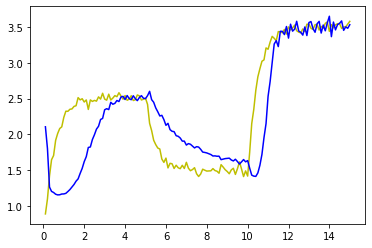

In [17]:
y_axis = values #network output
y = random_vals
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Train network using step function

In [18]:
values1 = train_weights_step(random_vals, 0.006531,10)

>epoch=0, lrate=0.007, error=3.578
>epoch=1, lrate=0.007, error=3.578
>epoch=2, lrate=0.007, error=3.578
>epoch=3, lrate=0.007, error=3.578
>epoch=4, lrate=0.007, error=3.578
>epoch=5, lrate=0.007, error=3.578
>epoch=6, lrate=0.007, error=3.578
>epoch=7, lrate=0.007, error=3.578
>epoch=8, lrate=0.007, error=3.578
>epoch=9, lrate=0.007, error=3.578


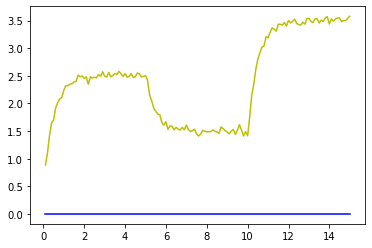

In [19]:
y_axis = values1 #network output
y = random_vals
x_axis = x = t_save2
plt.plot(x,y,"y") #robot
plt.plot(x_axis,y_axis,"b")#tracker
plt.show()

In [20]:
df6

,Noise_values,Trained,Error,T
0,"[0, 0, 0.8875202917819612]",2.105171,-1.217651,0.1
1,"[0, 1.0975650942998987, 0.8875202917819612]",1.800340,-0.702775,0.2
2,"[1.4176163487294013, 1.0975650942998987, 0.887...",1.262567,0.155049,0.3
3,"[1.6445462973139549, 1.4176163487294013, 1.097...",1.202389,0.442158,0.4
4,"[1.7038117228132812, 1.6445462973139549, 1.417...",1.186845,0.516967,0.5
...,...,...,...,...
145,"[3.4796608653147056, 3.5472457855895607, 3.544...",3.584773,-0.105112,14.6
146,"[3.5010608745159715, 3.4796608653147056, 3.547...",3.452555,0.048506,14.7
147,"[3.501513948870689, 3.5010608745159715, 3.4796...",3.500686,0.000828,14.8
148,"[3.5402946904406094, 3.501513948870689, 3.5010...",3.481899,0.058395,14.9


## Perceptron values against different noise samples(Sigmoid)

### Adding noise to other step sizes using box muller

#### Example 1(step size =0.1)

In [21]:
random_vals1 = []
random_vals1 = box_muller(x_save1,std_dev,_mean)
random_vals_t1 = []
random_vals_t1 = triple_converter(random_vals1)

#values,e = train_weights3(dat1, 0.01,1)
#0.006531
values1,e1 = train_weights3(random_vals_t1, 0.01,1)

>epoch=0, lrate=0.010, error=-0.034


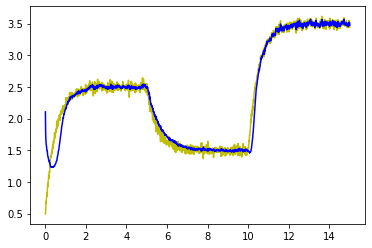

In [22]:
y_axis = values1 #network output
y = random_vals1
x_axis = x = t_save1
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

In [23]:
len(e1)

1500

In [24]:
data7= {'Noise_values':random_vals_t1,'Network_output':values1,'Error':e1,'T':t_save1}
vis= pd.DataFrame(data7)
vis

,Noise_values,Network_output,Error,T
0,"[0, 0, 0.4940031966567732]",2.105171,-1.611168,0.01
1,"[0, 0.5368767105437104, 0.4940031966567732]",1.801329,-1.264452,0.02
2,"[0.5847631263886017, 0.5368767105437104, 0.494...",1.675103,-1.090340,0.03
3,"[0.695111404611286, 0.5847631263886017, 0.5368...",1.627449,-0.932338,0.04
4,"[0.6617756545124919, 0.695111404611286, 0.5847...",1.583990,-0.922214,0.05
...,...,...,...,...
1495,"[3.5503903118350197, 3.495557445460004, 3.4876...",3.516350,0.034041,14.96
1496,"[3.4935564819349887, 3.5503903118350197, 3.495...",3.496320,-0.002764,14.97
1497,"[3.5151927417776236, 3.4935564819349887, 3.550...",3.520982,-0.005789,14.98
1498,"[3.5063498556974118, 3.5151927417776236, 3.493...",3.506411,-0.000061,14.99


#### Example 2(step size = 0.01)

In [25]:
random_vals2 = []
random_vals2 = box_muller(x_save2,std_dev,_mean)
random_vals_t2 =[]
random_vals_t2 = triple_converter(random_vals2)
values2,e2 =train_weights3(random_vals_t2,0.01,1)

>epoch=0, lrate=0.010, error=0.124


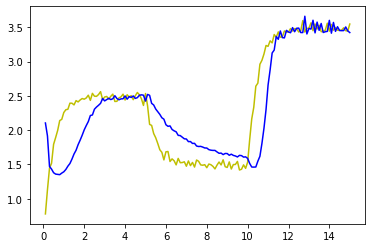

In [26]:
y_axis = values2 #network output
y = random_vals2 # x noise
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

In [27]:
len(values2)

150

In [28]:
data8= {'Noise_values':random_vals_t2,'Network_output':values2,'Error':e2,'T':t_save2}
vis1= pd.DataFrame(data8)
vis1

,Noise_values,Network_output,Error,T
0,"[0, 0, 0.7789175746091841]",2.105171,-1.326253,0.1
1,"[0, 1.1321418898663425, 0.7789175746091841]",1.916519,-0.784377,0.2
2,"[1.4465443006948657, 1.1321418898663425, 0.778...",1.470940,-0.024395,0.3
3,"[1.5177400820930198, 1.4465443006948657, 1.132...",1.432503,0.085237,0.4
4,"[1.79330336260381, 1.5177400820930198, 1.44654...",1.379955,0.413348,0.5
...,...,...,...,...
145,"[3.459345298716713, 3.4548236383735023, 3.4583...",3.452110,0.007236,14.6
146,"[3.493375014542748, 3.459345298716713, 3.45482...",3.452883,0.040492,14.7
147,"[3.4513997108116232, 3.493375014542748, 3.4593...",3.506054,-0.054654,14.8
148,"[3.4455148205533597, 3.4513997108116232, 3.493...",3.448693,-0.003178,14.9


#### Example 3(step size = 0.5)

In [29]:
random_vals3 = []
random_vals3 = box_muller(x_array4,std_dev,_mean)
random_vals_t3 = []
random_vals_t3 = triple_converter(random_vals3)
values3,e3 = train_weights3(random_vals_t3, 0.011,5)

>epoch=0, lrate=0.011, error=-0.024
>epoch=1, lrate=0.011, error=-0.025
>epoch=2, lrate=0.011, error=-0.025
>epoch=3, lrate=0.011, error=-0.025
>epoch=4, lrate=0.011, error=-0.025


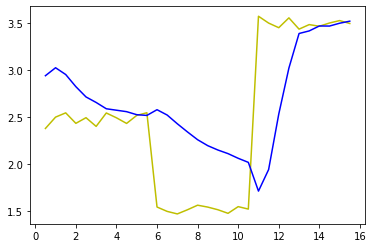

In [43]:
y_axis = values3 #network output
y = random_vals3 # x noise
x_axis = x = t_array4
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

In [31]:
data9= {'Noise_values':random_vals_t3,'Network_output':values3,'Error':e3,'T':t_array4}
vis2= pd.DataFrame(data9)
vis2

,Noise_values,Network_output,Error,T
0,"[0, 0, 2.377245555065313]",2.939269,-0.562024,0.5
1,"[0, 2.498050583390408, 2.377245555065313]",3.024081,-0.526030,1.0
2,"[2.5434260382408054, 2.498050583390408, 2.3772...",2.951828,-0.408402,1.5
3,"[2.431660227299647, 2.5434260382408054, 2.4980...",2.822589,-0.390929,2.0
4,"[2.491972968375717, 2.431660227299647, 2.54342...",2.713066,-0.221093,2.5
5,"[2.399287949318082, 2.491972968375717, 2.43166...",2.654150,-0.254862,3.0
6,"[2.5421770467738534, 2.399287949318082, 2.4919...",2.587126,-0.044949,3.5
7,"[2.4908497265084577, 2.5421770467738534, 2.399...",2.571615,-0.080766,4.0
8,"[2.4307885950885546, 2.4908497265084577, 2.542...",2.556168,-0.125380,4.5
9,"[2.516091711835813, 2.4307885950885546, 2.4908...",2.523925,-0.007833,5.0


#### Example 4(step size = 0.75)

In [44]:
random_vals4 = []
random_vals4 = box_muller(x_array5,std_dev,_mean)
random_vals_t4 = triple_converter(random_vals4)
values4,e4 = train_weights3(random_vals_t4, 0.01,5)

>epoch=0, lrate=0.010, error=-0.003
>epoch=1, lrate=0.010, error=-0.018
>epoch=2, lrate=0.010, error=-0.018
>epoch=3, lrate=0.010, error=-0.018
>epoch=4, lrate=0.010, error=-0.018


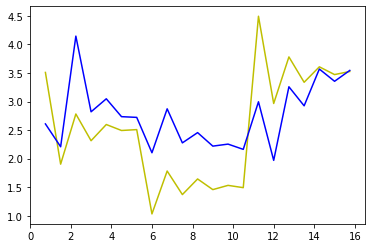

In [45]:
y_axis = values4 #network output
y = random_vals4 # x noise
x_axis = x = t_array5
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

In [46]:
#itr,input,output,error
data_10= {'Noise_values':random_vals_t4,'Network_output':values4,'Error':e4,'T':t_array5}
vis3= pd.DataFrame(data_10)
vis3

,Noise_values,Network_output,Error,T
0,"[0, 0, 3.5100475447774824]",2.608080,0.901967,0.75
1,"[0, 1.9029781767067542, 3.5100475447774824]",2.207805,-0.304826,1.50
2,"[2.7819682895477706, 1.9029781767067542, 3.510...",4.146585,-1.364617,2.25
3,"[2.313705951811431, 2.7819682895477706, 1.9029...",2.820237,-0.506531,3.00
4,"[2.5974013702195835, 2.313705951811431, 2.7819...",3.048277,-0.450876,3.75
5,"[2.49280830352852, 2.5974013702195835, 2.31370...",2.735174,-0.242366,4.50
6,"[2.508257913809775, 2.49280830352852, 2.597401...",2.722565,-0.214307,5.25
7,"[1.0307792424628799, 2.508257913809775, 2.4928...",2.102817,-1.072037,6.00
8,"[1.7823706306011773, 1.0307792424628799, 2.508...",2.872372,-1.090001,6.75
9,"[1.3696967277322236, 1.7823706306011773, 1.030...",2.275922,-0.906225,7.50


# Perceptron model with different learning rates

## Example 1

In [47]:
random_vals1 = []
random_vals1 = box_muller(x_save2,std_dev,_mean)
values1,e1 = train_weights(random_vals1, 0.006531,5)

>epoch=0, lrate=0.007, error=-0.028
>epoch=1, lrate=0.007, error=-0.028
>epoch=2, lrate=0.007, error=-0.028
>epoch=3, lrate=0.007, error=-0.028
>epoch=4, lrate=0.007, error=-0.028


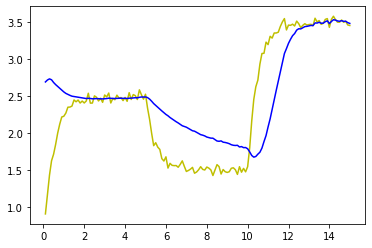

In [49]:
y_axis = values1 #network output
y = random_vals1
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

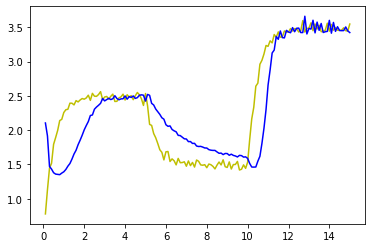

In [50]:
y_axis = values2 #network output
y = random_vals2 # x noise
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Example 2

In [37]:
random_vals1 = []
random_vals1 = box_muller(x_array2,std_dev,_mean)
values1,e1 = train_weights(random_vals1, 0.06531,5)

>epoch=0, lrate=0.065, error=1.989
>epoch=1, lrate=0.065, error=1.989
>epoch=2, lrate=0.065, error=1.989
>epoch=3, lrate=0.065, error=1.989
>epoch=4, lrate=0.065, error=1.989


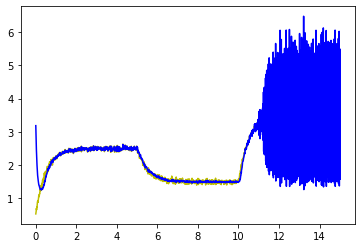

In [38]:
y_axis = values1 #network output
y = random_vals1
x_axis = x = t_array2
plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

## Example 3

In [39]:
random_vals8 = []
random_vals8 = box_muller(x_array2,std_dev,_mean)
values8,e8 = train_weights(random_vals8, 0.6531,5)

>epoch=0, lrate=0.653, error=2.333
>epoch=1, lrate=0.653, error=2.333
>epoch=2, lrate=0.653, error=2.333
>epoch=3, lrate=0.653, error=2.333
>epoch=4, lrate=0.653, error=2.333


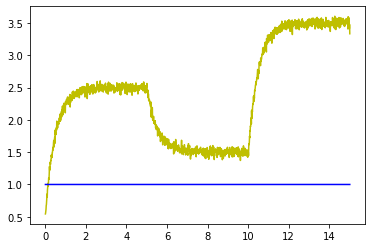

In [40]:
y_axis = values8 #network output
y = random_vals8
x_axis = x = t_array2
plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [41]:
data_11= {'Noise_values':random_vals8,'Network_output':values8,'Error':e8,'T':t_array2}
vis8= pd.DataFrame(data_11)
vis8

,Noise_values,Network_output,Error,T
0,0.544102,1.0,-0.455898,0.01
1,0.561030,1.0,-0.438970,0.02
2,0.591235,1.0,-0.408765,0.03
3,0.617401,1.0,-0.382599,0.04
4,0.673789,1.0,-0.326211,0.05
...,...,...,...,...
1496,3.552855,1.0,2.552855,14.97
1497,3.467910,1.0,2.467910,14.98
1498,3.412719,1.0,2.412719,14.99
1499,3.477536,1.0,2.477536,15.00


In [42]:
df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

NameError: name 'df' is not defined

In [51]:
random_vals3 = []
random_vals3 = box_muller(x_array4,std_dev,_mean)
random_vals_t3 = []
random_vals_t3 = triple_converter(x_array2)
values3,e3 = train_weights3(random_vals_t3, 0.011,5)

>epoch=0, lrate=0.011, error=0.000
>epoch=1, lrate=0.011, error=0.000
>epoch=2, lrate=0.011, error=0.000
>epoch=3, lrate=0.011, error=0.000
>epoch=4, lrate=0.011, error=0.000


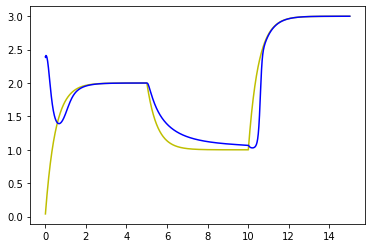

In [52]:
y_axis = values3 #network output
y = x_array2
x_axis = x = t_array2
plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [56]:
random_vals3 = []
random_vals3 = box_muller(x_array4,std_dev,_mean)
random_vals_t3 = []
random_vals_t3 = triple_converter(x_array2)
values3,e3 = train_weights(x_array2, 0.011,5)

>epoch=0, lrate=0.011, error=0.000
>epoch=1, lrate=0.011, error=0.000
>epoch=2, lrate=0.011, error=0.000
>epoch=3, lrate=0.011, error=0.000
>epoch=4, lrate=0.011, error=0.000


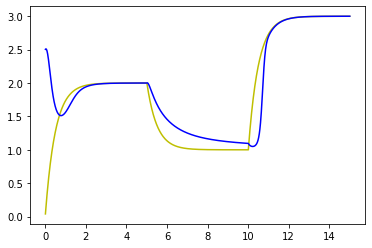

In [57]:
y_axis = values3 #network output
y = x_array2
x_axis = x = t_array2
plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [55]:
len(values3)

31